In [5]:
import neurom
from neurom import load_morphology
from neurom import NeuriteType
from neurom import viewer
from neurom.features import morphology

import numpy as np
import matplotlib.pyplot as plt
import os

(<Figure size 640x480 with 1 Axes>,
 <Axes3DSubplot:title={'center':'AA0136.swc'}, xlabel='X', ylabel='Y'>)

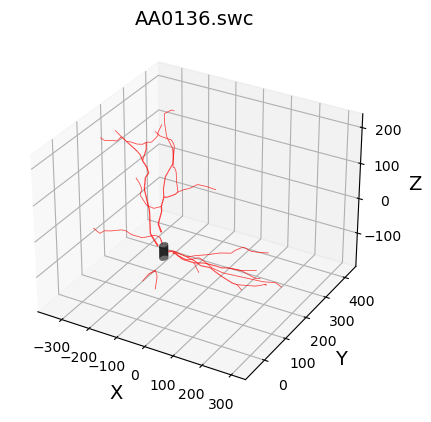

In [6]:
viewer.draw(neurom.load_morphology('AA0136.swc'), neurite_type=NeuriteType.basal_dendrite, mode='3d') 

(<Figure size 640x480 with 1 Axes>,
 <Axes3DSubplot:title={'center':'AA0719.swc'}, xlabel='X', ylabel='Y'>)

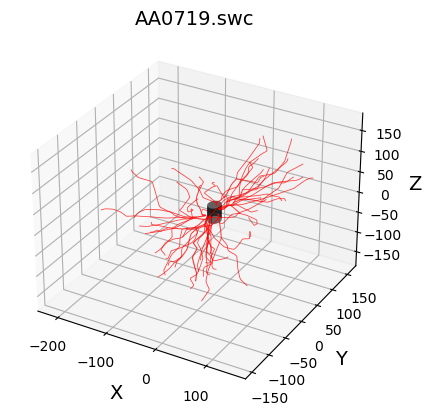

In [7]:
viewer.draw(neurom.load_morphology('AA0719.swc'), neurite_type=NeuriteType.basal_dendrite, mode='3d') 

In [8]:
#@feature(shape=(...,))
def sholl_frequency(morph, neurite_type=NeuriteType.all, step_size=10, bins=None):
    """Perform Sholl frequency calculations on a morph.

    Args:
        morph(Morphology): a morphology
        neurite_type(NeuriteType): which neurites to operate on
        step_size(float): step size between Sholl radii
        bins(iterable of floats): custom binning to use for the Sholl radii. If None, it uses
        intervals of step_size between min and max radii of ``morphologies``.

    Note:
        Given a morphology, the soma center is used for the concentric circles,
        which range from the soma radii, and the maximum radial distance
        in steps of `step_size`. Each segment of the morphology is tested, so a neurite that
        bends back on itself, and crosses the same Sholl radius will get counted as
        having crossed multiple times.

        If a `neurite_type` is specified and there are no trees corresponding to it, an empty
        list will be returned.
    """
    neurite_filter = is_type(neurite_type)

    if bins is None:
        min_soma_edge = morph.soma.radius

        max_radius_per_neurite = [
            np.max(np.linalg.norm(n.points[:, COLS.XYZ] - morph.soma.center, axis=1))
            for n in morph.neurites if neurite_filter(n)
        ]

        if not max_radius_per_neurite:
            return []

        bins = np.arange(min_soma_edge, min_soma_edge + max(max_radius_per_neurite), step_size)

    return sholl_crossings(morph, neurite_type, morph.soma.center, bins)

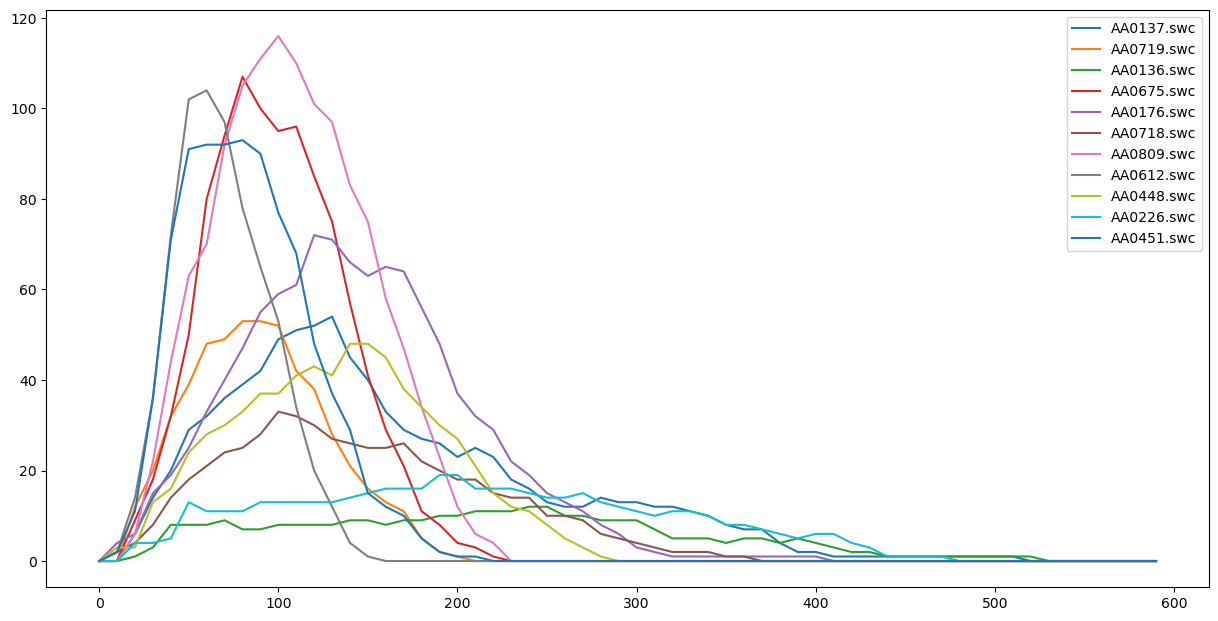

In [10]:
plt.figure(figsize=(15, 7.5))
x = np.arange(0.0, 600, 10)

for filename in os.listdir('.'):
    if filename.endswith('.swc'):
        m = neurom.load_morphology(filename)
        y = morphology.sholl_crossings(m, radii=x)
        plt.plot(x, y, label=filename)
plt.legend()

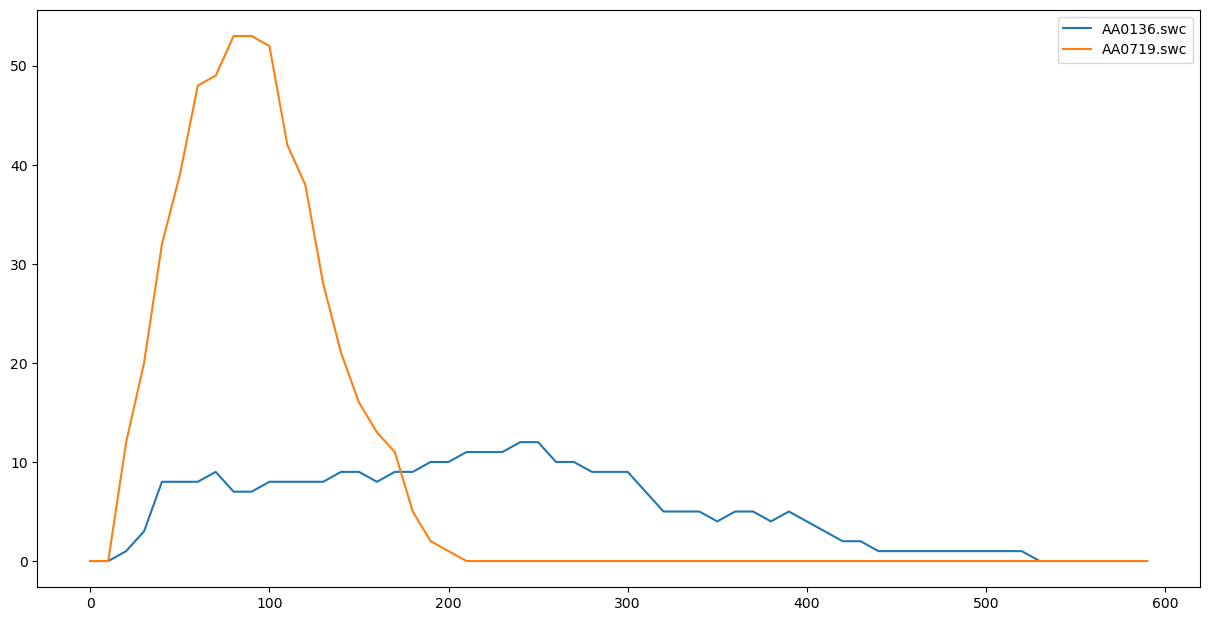

In [11]:
plt.figure(figsize=(15, 7.5))
x = np.arange(0.0, 600, 10)

for filename in ['AA0136.swc', 'AA0719.swc']:
    m = neurom.load_morphology(filename)
    y = morphology.sholl_crossings(m, center=[0.0, 0.0, 0.0], radii=x)
    plt.plot(x, y, label=filename)
plt.legend()